In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats


In [2]:
data = pd.read_csv("titanic_train.csv", usecols=['Age','Fare','Survived'])
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
data.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [0]:
#take the null feature and replace with random sample values
def imputeNA(data, variable):
  df = data.copy()
  #random sample
  df[variable+'_random'] = df[variable]
  randomSample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)

  #pandas need same index to merge
  randomSample.index = df[df[variable].isnull()].index
  df.loc[df[variable].isnull(), variable+'_random'] = randomSample

  return df[variable+'_random']

In [0]:
data['Age'] = imputeNA(data,"Age")

In [6]:
data.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [7]:
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


# Q-Q Plot

In [0]:
def diagnosticPlots(df, var):
  #histogram
  plt.figure(figsize=(15,6))
  plt.subplot(1,2,1)
  df[var].hist()

  #Probability plot
  plt.subplot(1,2,2)
  stats.probplot(df[var], dist="norm", plot=plt)

  plt.show()

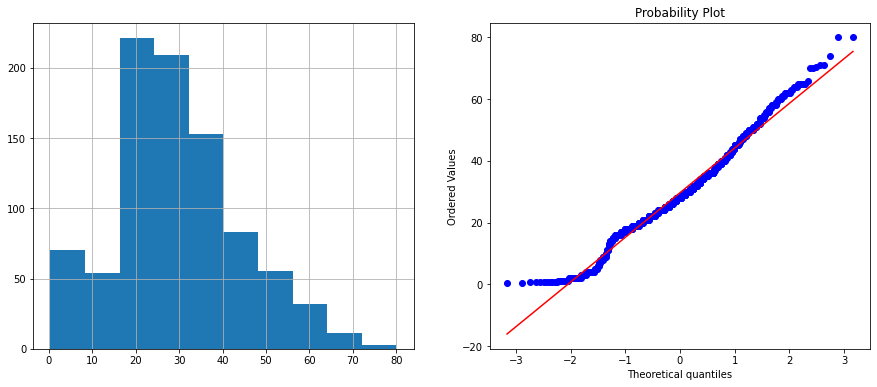

In [9]:
diagnosticPlots(data, 'Age')

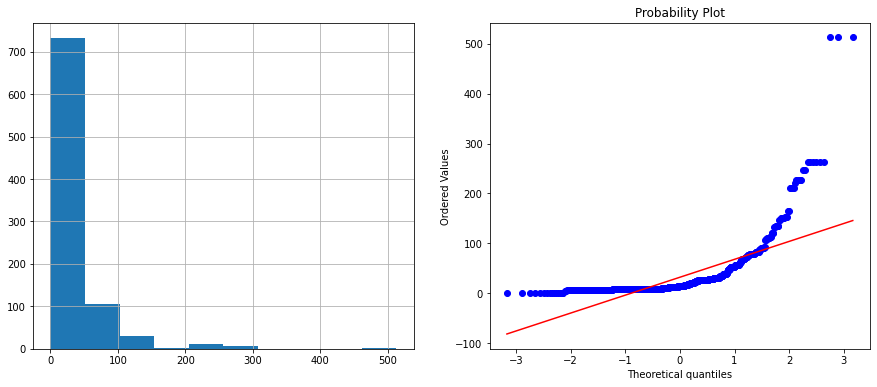

In [10]:
#here Age is perfectly transformed in GD
#for 'fare'
diagnosticPlots(data, 'Fare')

In [0]:
#we have to transform this column

#TODO: 1 => Lograithmic Transformation


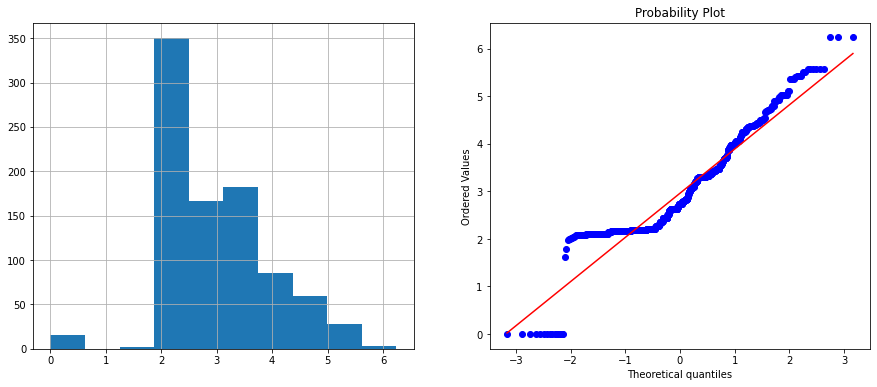

In [12]:
data['FareLog'] = np.log(data['Fare'] +1)
diagnosticPlots(data, 'FareLog')

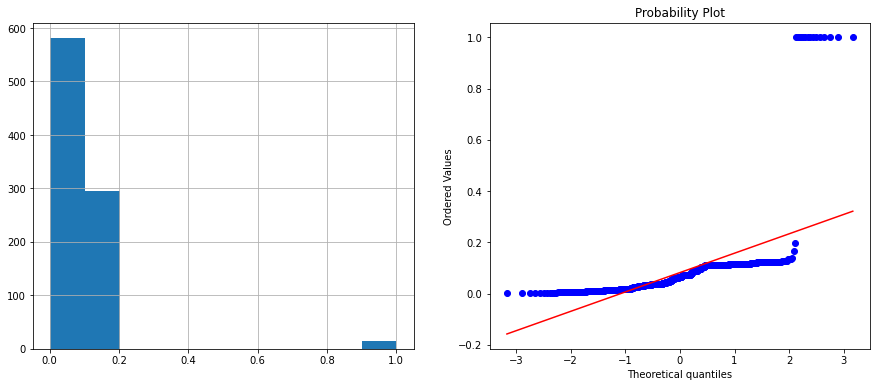

In [13]:
#TODO2 : Reciprocal Transformation
data['RecFare'] = 1/(data['Fare'] +1)
diagnosticPlots(data, 'RecFare')

In [0]:
#reciprocal transformation is not working here

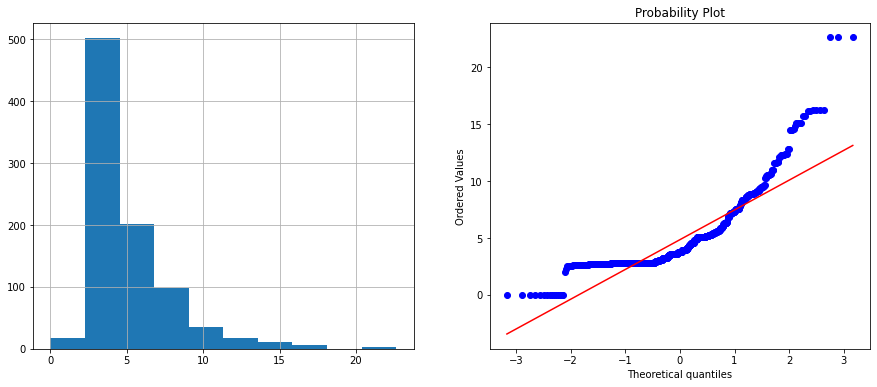

In [15]:
#TODO 3: Sq.Root Transformation
data['SqrFare'] = data['Fare']**(1/2)
diagnosticPlots(data, 'SqrFare')

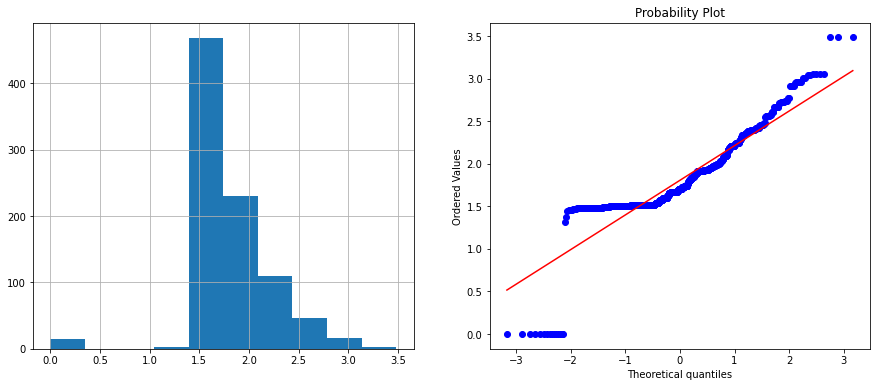

In [16]:
#TODO 4: Exponential Transformation
data['ExpFare'] = data['Fare']**(1/5)
diagnosticPlots(data,'ExpFare')